In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.neighbors import DistanceMetric
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import cluster
from sklearn.decomposition.pca import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn import preprocessing
from definitions import *

In [2]:
def angsep(ra1,dec1,ra2,dec2):
    SEP = numpy.cos(dec1*numpy.pi/180)*numpy.cos(dec2*numpy.pi/180)*numpy.cos((ra1-ra2)*numpy.pi/180)
    SEP += numpy.sin(dec1*numpy.pi/180)*numpy.sin(dec2*numpy.pi/180) #returns values between 0 and pi radians
    SEP = numpy.arccos(SEP)
    return SEP*180./numpy.pi

In [3]:
pd_common_gevtevxmm = pd.read_csv("markeddata/gevtevsimbadxmm_001_normalized.txt", sep='\t')
pd_common_gevtevxmm_noLog = pd.read_csv("markeddata/gevtevsimbadxmm_001_normalizedWITHOUT_LOG.txt", sep='\t')

In [4]:
pd_common_gevtevxmm_noLog[pd_common_gevtevxmm_noLog['marked']== 1]

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,s_class,gev_1FGL_Name,gev_CLASS1,gev_GLON,gev_GLAT,tev_fermi_names,tev_classes,tev_glat,tev_glon,marked
209,0.000000e+00,0.000000,0.000007,0.000000,0.000075,0.014498,0.216180,0.331050,0.099179,0.322267,...,['B0Ve'],b'1FGL J0240.5+6113 ',b'HMB ',135.678848,1.086277,b'',b'bin',1.086135,135.675278,1
495,0.000000e+00,0.000039,0.000030,0.000005,0.000000,0.011784,0.275804,0.292658,0.132576,0.240877,...,['B0Ve'],b' ',b'PSR ',284.083496,-1.893881,b'1FGL J1018.6-5856',b'bin',-1.779517,284.314087,1
1610,0.000000e+00,0.000005,0.000012,0.000012,0.000002,0.007597,0.117061,0.309339,0.034504,0.203534,...,['B0Ve'],b'1FGL J1826.2-1450 ',b'HMB ',16.885555,-1.293795,b'',b'bin',-1.289216,16.881586,1
1835,1.857346e-07,0.000009,0.000022,0.000003,0.000006,0.022408,0.362246,0.111726,0.253937,0.249643,...,['B0Ve'],b'1FGL J2032.2+4127 ',b'PSR ',80.218597,1.018827,b'',b'unid',1.111117,80.299477,1


In [5]:
pd_common_gevtevxmm[pd_common_gevtevxmm['marked'] != 0]

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,s_class,gev_1FGL_Name,gev_CLASS1,gev_GLON,gev_GLAT,tev_fermi_names,tev_classes,tev_glat,tev_glon,marked
209,-0.000000,-0.000000,0.103970,-0.000000,0.096625,0.080271,0.071880,0.070557,0.074300,0.070641,...,['B0Ve'],b'1FGL J0240.5+6113 ',b'HMB ',135.678848,1.086277,b'',b'bin',1.086135,135.675278,1
495,-0.000000,0.090377,0.091078,0.095727,-0.000000,0.075041,0.066570,0.066411,0.068538,0.066934,...,['B0Ve'],b' ',b'PSR ',284.083496,-1.893881,b'1FGL J1018.6-5856',b'bin',-1.779517,284.314087,1
1610,-0.000000,0.089099,0.086865,0.086916,0.091221,0.070010,0.062826,0.060273,0.066035,0.061373,...,['B0Ve'],b'1FGL J1826.2-1450 ',b'HMB ',16.885555,-1.293795,b'',b'bin',-1.289216,16.881586,1
1835,0.127572,0.114688,0.111631,0.117882,0.116053,0.088584,0.079311,0.083231,0.080495,0.080552,...,['B0Ve'],b'1FGL J2032.2+4127 ',b'PSR ',80.218597,1.018827,b'',b'unid',1.111117,80.299477,1


In [6]:
pd_common_gevtevxmm

,xmm_SC_EP_1_FLUX,xmm_SC_EP_2_FLUX,xmm_SC_EP_3_FLUX,xmm_SC_EP_4_FLUX,xmm_SC_EP_5_FLUX,gev_nuFnu10000_100000,gev_nuFnu1000_3000,gev_nuFnu100_300,gev_nuFnu3000_10000,gev_nuFnu300_1000,...,s_class,gev_1FGL_Name,gev_CLASS1,gev_GLON,gev_GLAT,tev_fermi_names,tev_classes,tev_glat,tev_glon,marked
0,0.081597,0.083385,0.087549,0.080252,0.072789,0.058810,0.053713,0.056084,0.054118,0.054577,...,[],b'1FGL J0007.0+7303 ',b'PSR ',119.662102,10.460557,b'',"b'pwn,snr'",10.203682,119.580254,0
1,0.081538,0.073453,0.073100,0.074908,-0.000000,0.068704,0.068562,0.076194,0.070171,0.066850,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
2,0.066945,0.059547,0.057954,0.058218,0.062214,0.068519,0.068377,0.075988,0.069982,0.066670,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
3,0.073762,0.066913,0.065305,0.065872,0.078508,0.064035,0.063903,0.071016,0.065403,0.062307,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
4,0.070027,0.062603,0.060849,0.062475,0.067580,0.066680,0.066542,0.073949,0.068104,0.064880,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
5,0.074231,0.074503,0.065392,0.064912,0.071609,0.064007,0.063875,0.070985,0.065374,0.062280,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
6,0.074905,0.067433,0.067247,0.067549,0.074540,0.063906,0.063774,0.070873,0.065271,0.062181,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
7,0.075823,0.071235,0.065737,0.065348,0.075268,0.063735,0.063603,0.070683,0.065096,0.062015,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
8,0.076629,0.071910,0.067346,0.068430,0.079870,0.062673,0.062543,0.069505,0.064011,0.060981,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0
9,0.088946,0.076997,0.072486,0.073563,-0.000000,0.067817,0.067677,0.075210,0.069266,0.065987,...,[],b' ',b'snr ',120.125992,1.337755,b'',b'snr',1.412930,120.092361,0


In [7]:
pd_common_gevtevxmm = pd_common_gevtevxmm.loc[:, ~pd_common_gevtevxmm.columns.str.contains('^Unnamed')]

In [8]:
spectra_columns = list_xmm_spectra_columns() + list_gev_spectrum_columns() + list_tev_spectrum_columns()
other_columns = list_xmm_other_columns() + list_gev_other_columns() + list_tev_other_columns()

In [9]:
def show_marked_spectra(spectra_columns, spectra):
    plt.clf()
    fig, ax = plt.subplots(figsize=(16,6))
    marked_spectra = spectra[spectra['marked'] == 1]
    
    for i in range(0,len(marked_spectra)):
        table = marked_spectra[spectra_columns].iloc[i]
        values = table.values

        spectra_points_number = len(spectra_columns)
        plt.xticks(())
        #if i == 0:
        #    plt.setp([plt], title='Normalized columns')
        if i == 3:
            #plt.set_xlabel('optics - gev - tev')
            plt.xticks(range(spectra_points_number), spectra_columns,rotation=45)
        ax.plot(range(len(values)), marked_spectra[spectra_columns].iloc[i].values, label=marked_spectra['gev_1FGL_Name'].values[i])
        legend = ax.legend(loc = 'upper right')   
    plt.show()

In [10]:
(pd_common_gevtevxmm[pd_common_gevtevxmm['marked'] == 1])[['gev_1FGL_Name', 's_MAIN_ID', 's_class', 'tev_glat', 'tev_glon']]

,gev_1FGL_Name,s_MAIN_ID,s_class,tev_glat,tev_glon
209,b'1FGL J0240.5+6113 ',"[""b'LS I +61 303'"" ""b'LS I +61 303'""]",['B0Ve'],1.086135,135.675278
495,b' ',"[""b'2FGL J1019.0-5856'""]",['B0Ve'],-1.779517,284.314087
1610,b'1FGL J1826.2-1450 ',"[""b'V* V479 Sct'""]",['B0Ve'],-1.289216,16.881586
1835,b'1FGL J2032.2+4127 ',"[""b'[MT91] 213'"" ""b'Schulte 21'""]",['B0Ve'],1.111117,80.299477


<Figure size 432x288 with 0 Axes>

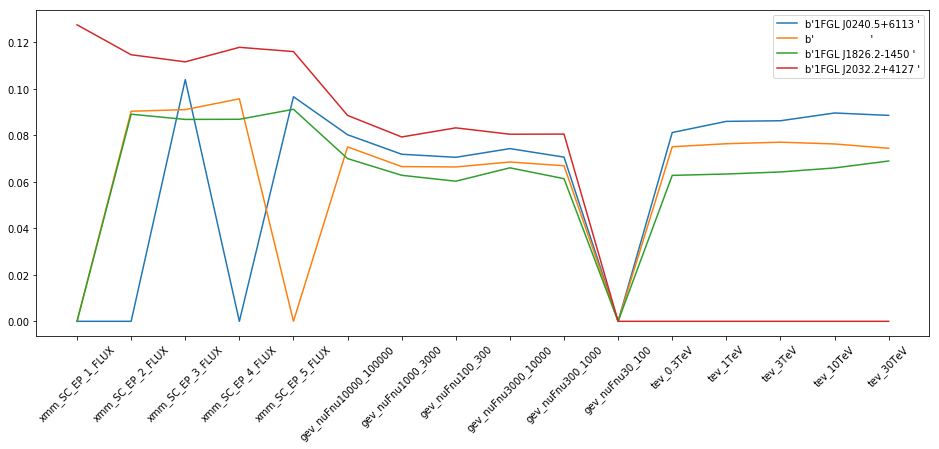

In [11]:
show_marked_spectra(spectra_columns, pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

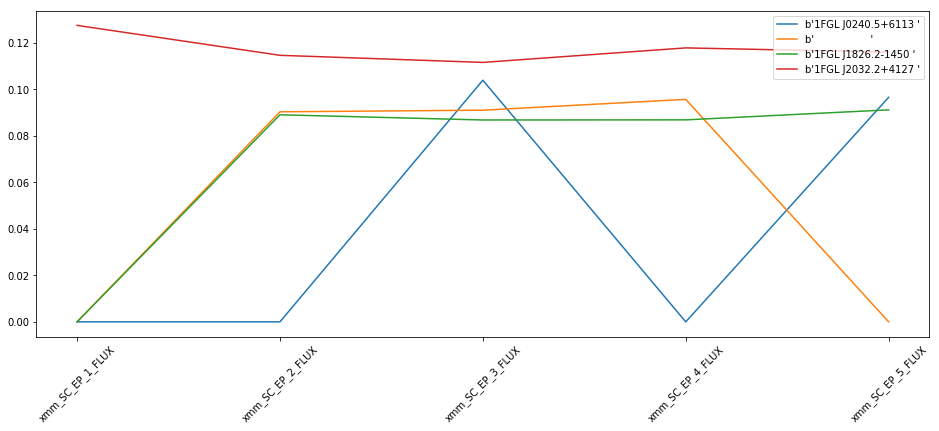

In [12]:
show_marked_spectra(list_xmm_spectra_columns(), pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

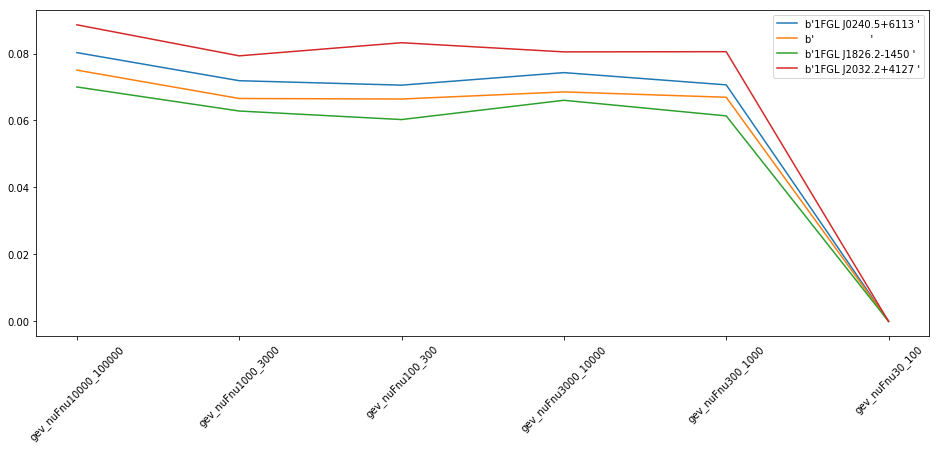

In [13]:
show_marked_spectra(list_gev_spectrum_columns(), pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

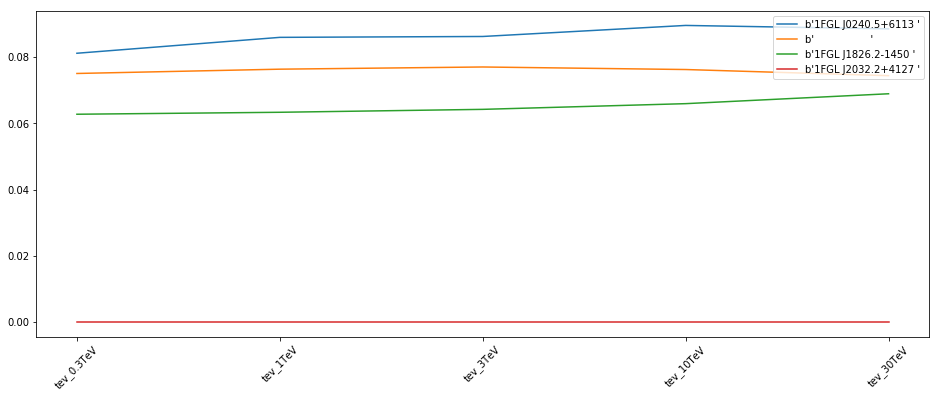

In [14]:
show_marked_spectra(list_tev_spectrum_columns(), pd_common_gevtevxmm)

<Figure size 432x288 with 0 Axes>

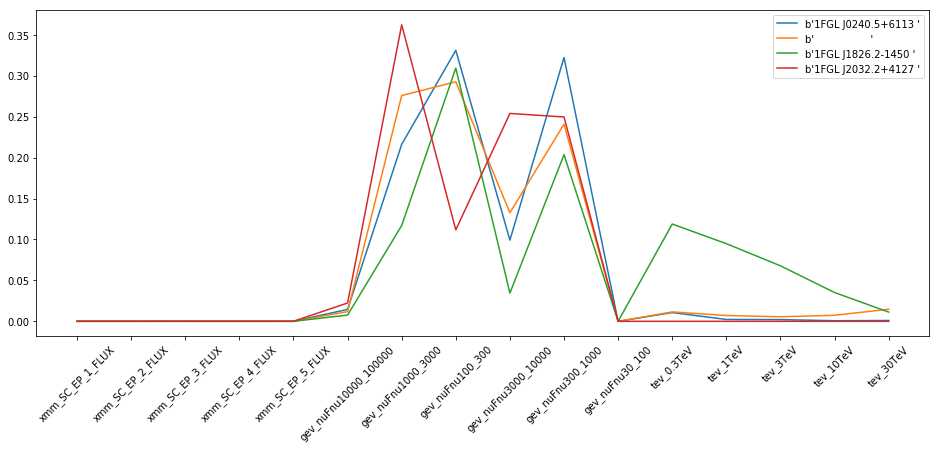

In [15]:
show_marked_spectra(spectra_columns, pd_common_gevtevxmm_noLog)